In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns
sns.set()

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install scikit-learn==0.21.3

In [3]:
from sklearn.datasets import make_blobs

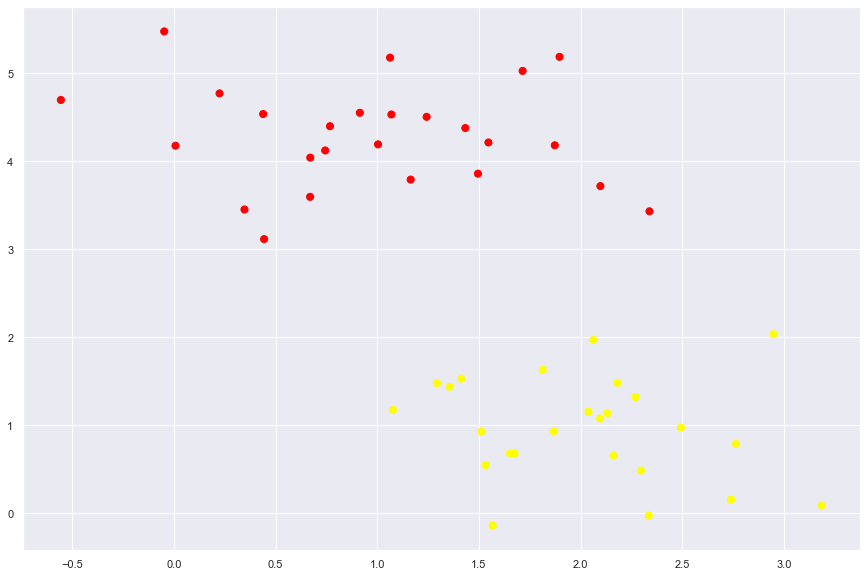

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

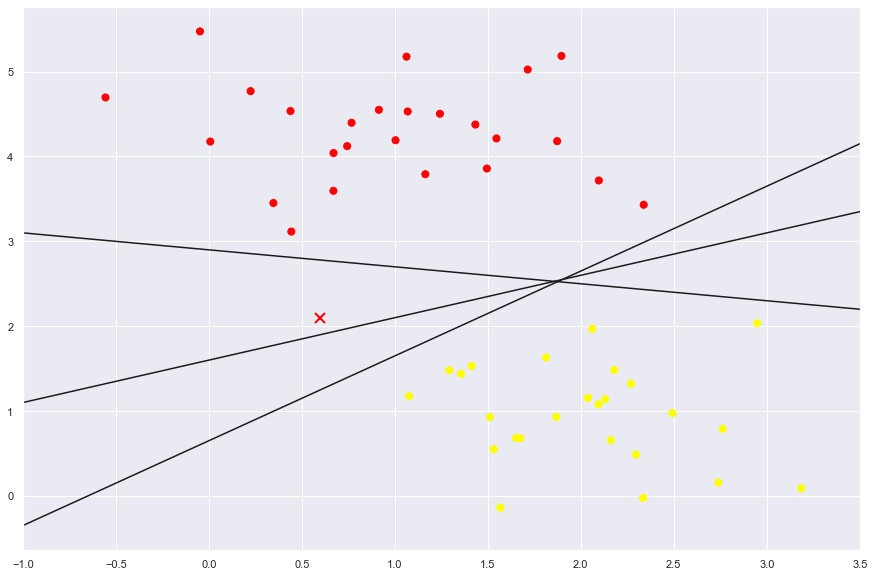

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

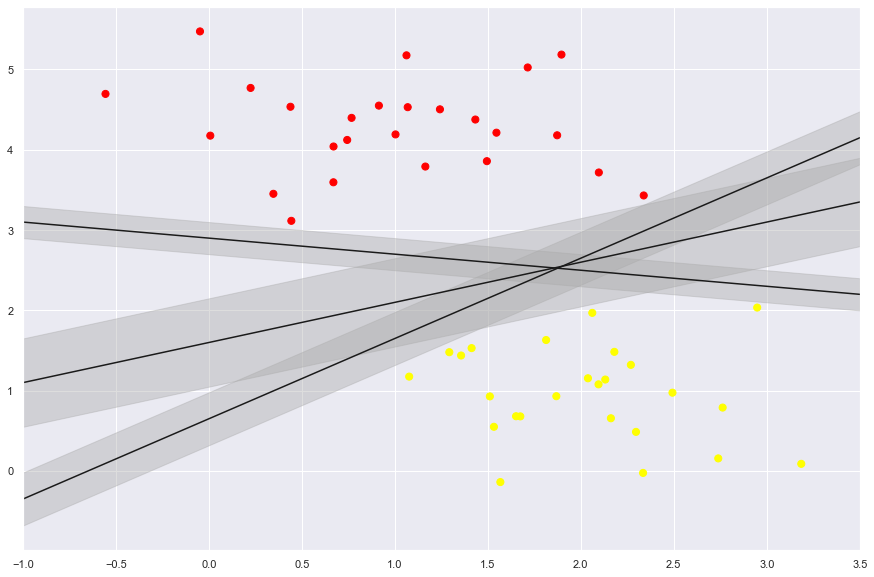

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [7]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

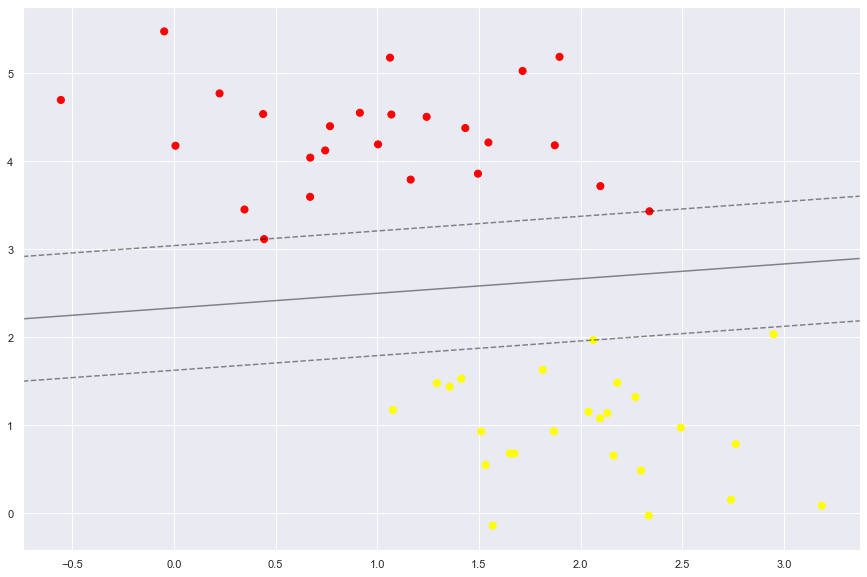

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

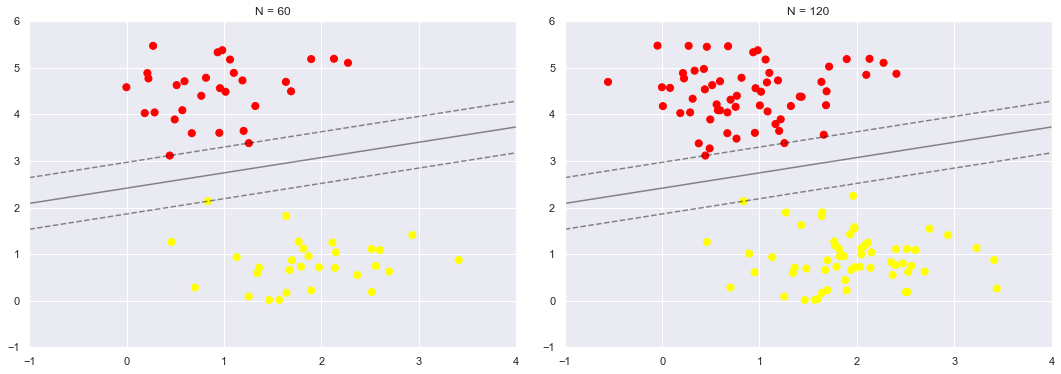

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50,marker='o', cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [12]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

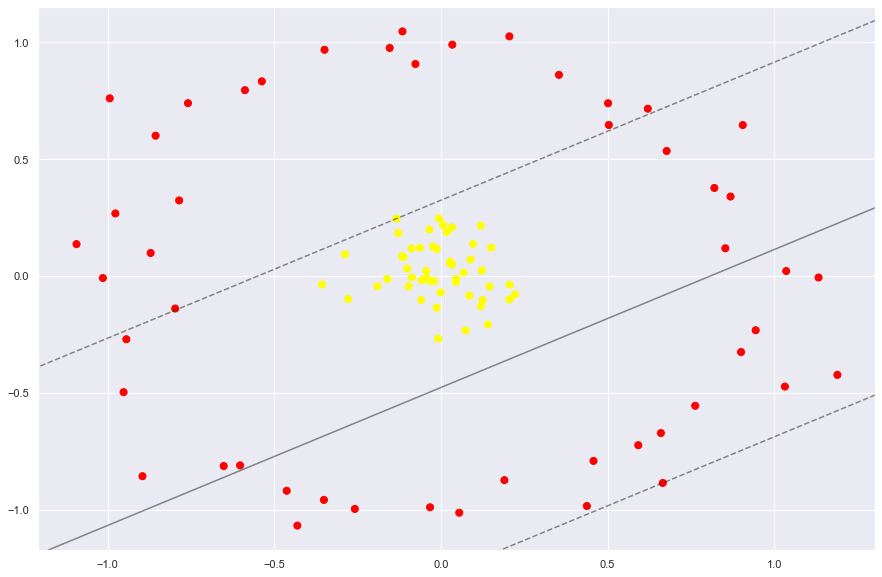

In [13]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [14]:
X

array([[-2.87997803e-01,  9.28918767e-02],
       [-1.15552342e-01,  1.04631099e+00],
       [ 8.53282151e-01,  1.18529080e-01],
       [-2.08185844e-02, -2.16331876e-02],
       [ 1.22582921e-01,  2.40818993e-02],
       [ 1.40756322e-01, -2.07528727e-01],
       [-8.82914772e-02,  1.18004042e-01],
       [-9.93754689e-01,  7.60006964e-01],
       [ 2.22518498e-01, -7.87780485e-02],
       [ 2.05633079e-01, -1.00044553e-01],
       [-4.62881791e-01, -9.18710936e-01],
       [-4.40595926e-02,  2.17607200e-02],
       [-8.71150632e-01,  9.84956166e-02],
       [-1.29163303e-02,  1.15686612e-01],
       [ 1.76205689e-02,  1.88528540e-01],
       [ 3.40199607e-02,  9.89578650e-01],
       [ 9.05545172e-01,  6.45695678e-01],
       [-5.37511783e-01,  8.32706199e-01],
       [ 8.68895835e-01,  3.39886314e-01],
       [ 1.03594696e+00,  2.12683869e-02],
       [-1.53849724e-01,  9.75536052e-01],
       [ 1.19244524e-01,  2.15581996e-01],
       [ 6.77202516e-01,  5.34854800e-01],
       [-3.

In [15]:
1.06909564e-01**2 +  1.09777740e+00**2

1.2165448748254302

In [16]:
(X ** 2).sum(1)

array([9.15716355e-02, 1.10811902e+00, 7.42139572e-01, 9.01408265e-04,
       1.56065105e-02, 6.28805145e-02, 2.17203388e-02, 1.56515897e+00,
       5.57204629e-02, 5.22938757e-02, 1.05828934e+00, 2.41477664e-03,
       7.68604810e-01, 1.35502237e-02, 3.58534949e-02, 9.80423262e-01,
       1.23693497e+00, 9.82318531e-01, 8.70502678e-01, 1.07363846e+00,
       9.75340327e-01, 6.06948537e-02, 7.44672905e-01, 1.28626945e-01,
       8.90185000e-01, 2.32926776e-02, 1.53567412e+00, 1.84868474e-02,
       1.02829554e+00, 1.28366879e+00, 2.80131370e-02, 1.15992879e+00,
       1.12597786e-02, 2.08524094e-02, 1.28871127e+00, 2.66796049e-03,
       8.35237006e-01, 1.39822568e-02, 3.10906857e-02, 7.18021802e-02,
       9.79896868e-01, 1.09297581e+00, 9.64281474e-01, 1.22675914e+00,
       6.71110185e-01, 8.73144179e-02, 2.61523158e-02, 1.09336245e+00,
       9.16572824e-01, 8.65540405e-01, 7.98877305e-01, 4.61626762e-03,
       4.40374003e-02, 2.24954786e-03, 4.07805487e-02, 1.02932547e+00,
      

In [17]:
r = np.exp(-(X ** 2).sum(1))

In [18]:
np.exp(-1.216)

0.2964134525853191

In [19]:
r

array([0.91249595, 0.33017944, 0.47609419, 0.999099  , 0.98451464,
       0.93905567, 0.97851385, 0.20905478, 0.94580349, 0.94904992,
       0.34704899, 0.99758814, 0.46365951, 0.98654117, 0.96478163,
       0.37515228, 0.29027255, 0.37444194, 0.418741  , 0.34176276,
       0.37706401, 0.94111037, 0.47488961, 0.87930193, 0.41057979,
       0.9769765 , 0.2153105 , 0.98168299, 0.35761598, 0.27701911,
       0.97237559, 0.31350851, 0.98880338, 0.9793635 , 0.27562576,
       0.9973356 , 0.43377166, 0.98611504, 0.96938766, 0.93071499,
       0.37534981, 0.33521746, 0.38125704, 0.29324139, 0.5111408 ,
       0.91638892, 0.97418669, 0.33508788, 0.39988718, 0.42082408,
       0.44983371, 0.99539437, 0.95691817, 0.99775298, 0.96003979,
       0.35724786, 0.9871586 , 0.43675411, 0.9624394 , 0.98575377,
       0.94131385, 0.45038329, 0.35314451, 0.44265464, 0.41188919,
       0.35841074, 0.38843302, 0.98868811, 0.99509978, 0.33765171,
       0.37617069, 0.3253811 , 0.94227611, 0.31546835, 0.95093

In [20]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

Text(0.5, 0, 'r')

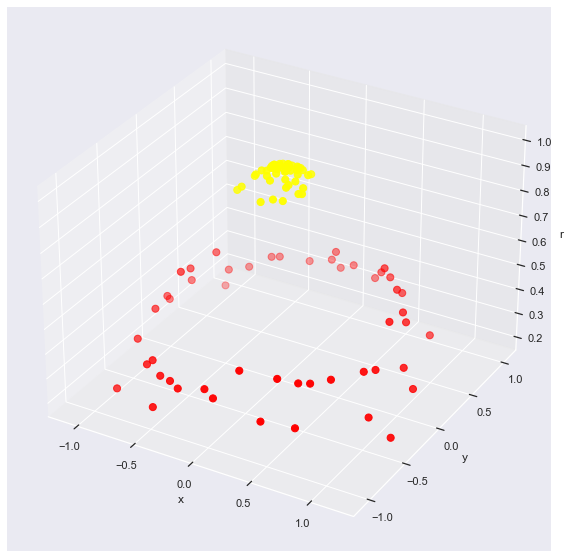

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [22]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [23]:
clf.support_vectors_

array([[ 0.85328215,  0.11852908],
       [-0.46288179, -0.91871094],
       [ 0.76291219, -0.55511259],
       [ 0.5036392 ,  0.6461097 ],
       [ 0.19039923, -0.87328428],
       [-0.07657078,  0.90692989],
       [-0.78559564,  0.32316133],
       [-0.79748559, -0.13920391],
       [ 0.2225185 , -0.07877805],
       [ 0.11924452,  0.215582  ],
       [-0.35678205, -0.03651729]])

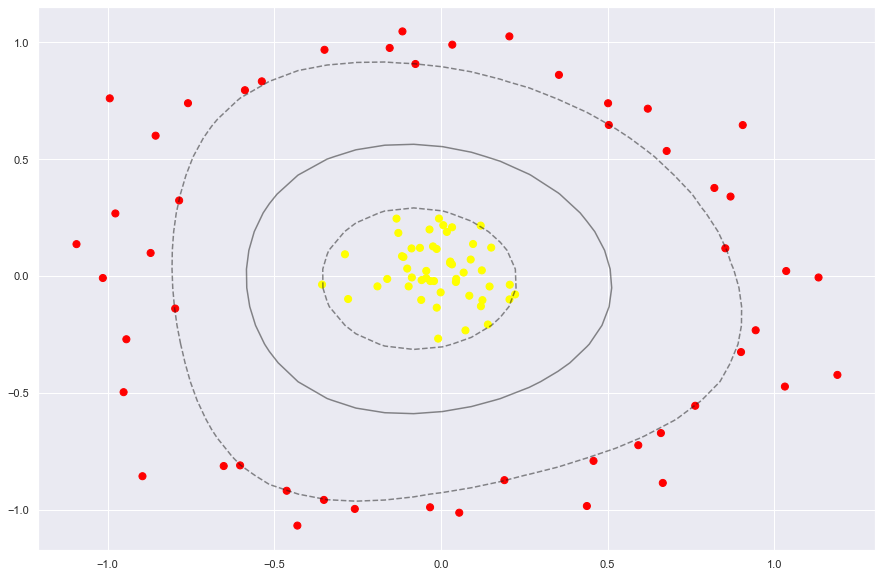

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

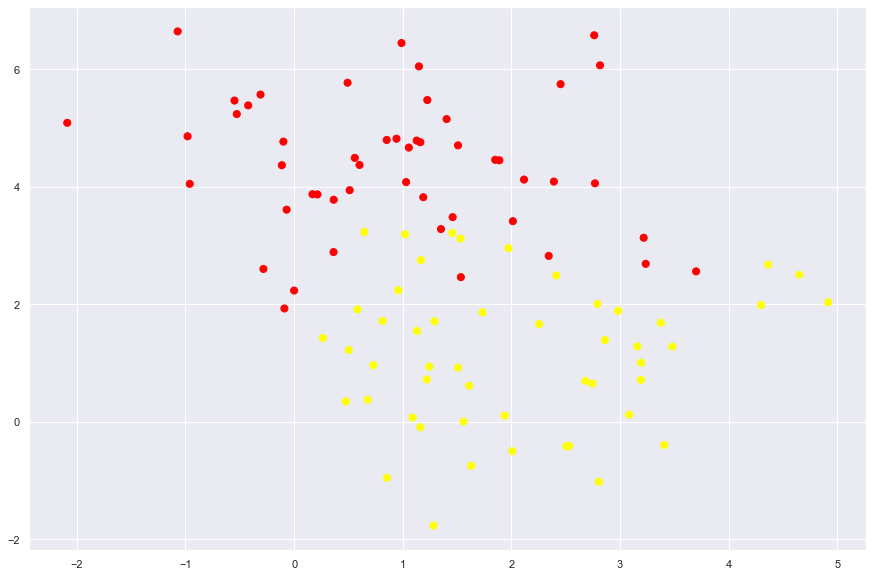

In [25]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

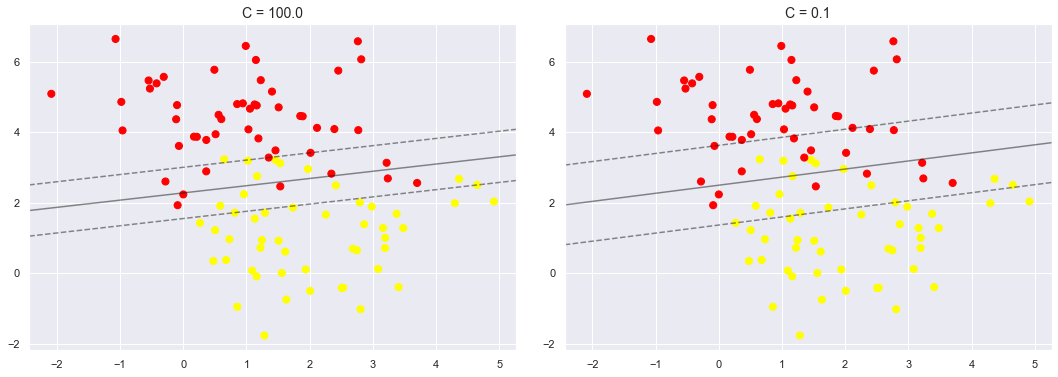

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [27]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

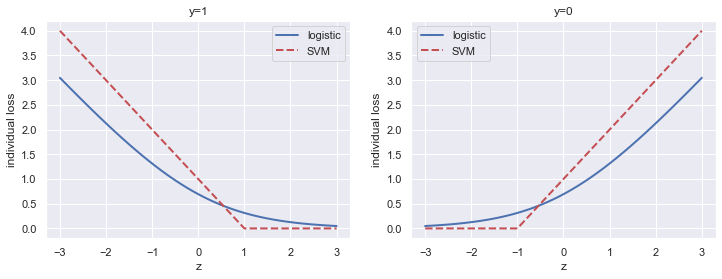

In [28]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')
ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')
ax[0].set_title('y=1')
ax[1].set_title('y=0')
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()